### Stephen Suruga  
### Capstone Project  
### DAB March 2024 Cohort

In [2]:
import pandas as pd
import os
import glob
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar

In [3]:
# Path to the directory containing the Excel files 04-15
file_directory = 'C:\\Users\\ReconGummyBear\\Documents\\Python Scripts\\capstonedata\\'

In [6]:
# List files in the directory
files = os.listdir(file_directory)
print("Files in directory:", files)

Files in directory: ['SouthsideSales04.xlsx', 'SouthsideSales05.xlsx', 'SouthsideSales06.xlsx', 'SouthsideSales07.xlsx', 'SouthsideSales08.xlsx', 'SouthsideSales09.xlsx', 'SouthsideSales10.xlsx', 'SouthsideSales11.xlsx', 'SouthsideSales12.xlsx', 'SouthsideSales13.xlsx', 'SouthsideSales14.xlsx', 'SouthsideSales15.xlsx', 'SouthsideSales16.xlsx', 'SouthsideSales17.xlsx', 'SouthsideSales18.xlsx', 'SouthsideSales19.xlsx', 'SouthsideSales20.xlsx', 'SouthsideSales21.xlsx', 'SouthsideSales22.xlsx', 'SouthsideSales23.xlsx']


In [8]:
# Get all Excel files in the directory
excel_files = glob.glob(file_directory + '*.xlsx')

# Print the list of Excel files to verify
print("Excel files found:", excel_files)

# Initialize an empty list to store DataFrames
data_frames = []

Excel files found: ['C:\\Users\\ReconGummyBear\\Documents\\Python Scripts\\capstonedata\\SouthsideSales04.xlsx', 'C:\\Users\\ReconGummyBear\\Documents\\Python Scripts\\capstonedata\\SouthsideSales05.xlsx', 'C:\\Users\\ReconGummyBear\\Documents\\Python Scripts\\capstonedata\\SouthsideSales06.xlsx', 'C:\\Users\\ReconGummyBear\\Documents\\Python Scripts\\capstonedata\\SouthsideSales07.xlsx', 'C:\\Users\\ReconGummyBear\\Documents\\Python Scripts\\capstonedata\\SouthsideSales08.xlsx', 'C:\\Users\\ReconGummyBear\\Documents\\Python Scripts\\capstonedata\\SouthsideSales09.xlsx', 'C:\\Users\\ReconGummyBear\\Documents\\Python Scripts\\capstonedata\\SouthsideSales10.xlsx', 'C:\\Users\\ReconGummyBear\\Documents\\Python Scripts\\capstonedata\\SouthsideSales11.xlsx', 'C:\\Users\\ReconGummyBear\\Documents\\Python Scripts\\capstonedata\\SouthsideSales12.xlsx', 'C:\\Users\\ReconGummyBear\\Documents\\Python Scripts\\capstonedata\\SouthsideSales13.xlsx', 'C:\\Users\\ReconGummyBear\\Documents\\Python Scri

In [10]:
# Loop through each file and load it into a DataFrame
for file in excel_files:
    df = pd.read_excel(file)
    data_frames.append(df)

In [12]:
# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(data_frames, ignore_index=True)

In [ ]:
# Read the Excel file
merged_df = pd.read_excel('Merged_SouthsideSales.xlsx')

In [14]:
# Inspect the merged DataFrame
print("Merged DataFrame:")
print(merged_df.head())

Merged DataFrame:
   LISTING_ID           UNPARSED_ADDRESS     CITY POSTAL_CODE     REGION  \
0      402987  6003 Spinnaker Cove Court  Suffolk       23435  Southside   
1      411291         105 Mcintosh Court  Suffolk       23434  Southside   
2      416994      5240 River Club Drive  Suffolk       23435  Southside   
3      326308      5207 Rockport Landing  Suffolk       23435  Southside   
4      402332        6007 Spinnaker Cove  Suffolk       23435  Southside   

  MLS_AREA_MAJOR          MLS_AREA_MINOR      SUBDIVISION  \
0        Suffolk  61 - Northeast Suffolk   THE RIVERFRONT   
1        Suffolk    62 - Central Suffolk  APPLEWOOD FARMS   
2        Suffolk  61 - Northeast Suffolk   THE RIVERFRONT   
3        Suffolk  61 - Northeast Suffolk   THE RIVERFRONT   
4        Suffolk  61 - Northeast Suffolk   THE RIVERFRONT   

          PROPERTY_TYPE STANDARD_STATUS  ... FALLOUT_FLAG BOM_FLAG  \
0  Residential Detached          Closed  ...            0        0   
1  Residential Det

In [16]:
# Get info on data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246471 entries, 0 to 246470
Data columns (total 65 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   LISTING_ID                      246471 non-null  int64         
 1   UNPARSED_ADDRESS                246471 non-null  object        
 2   CITY                            246374 non-null  object        
 3   POSTAL_CODE                     246471 non-null  object        
 4   REGION                          246471 non-null  object        
 5   MLS_AREA_MAJOR                  246471 non-null  object        
 6   MLS_AREA_MINOR                  246471 non-null  object        
 7   SUBDIVISION                     246471 non-null  object        
 8   PROPERTY_TYPE                   246471 non-null  object        
 9   STANDARD_STATUS                 246471 non-null  object        
 10  STANDARD_LISTING_CONDITIONS     246471 non-null  object 

In [18]:
# Check data describe
merged_df.describe()

,LISTING_ID,ON_MARKET_DATE,LIST_PRICE,LIST_PRICE_PER_SQFT,ORIGINAL_LIST_PRICE,PURCHASE_CONTRACT_DATE,CLOSE_DATE,CLOSE_PRICE,CLOSE_PRICE_PER_SQFT,CLOSE_PRICE_PER_ACRE,...,PENDING_FLAG,FALLOUT_FLAG,BOM_FLAG,PRICE_AT_EOM,PRICE_CHG,Price_Change_Percent,UNSOLD_FLAG,LATITUDE,LONGITUDE,MODIFICATION_DATE
count,2.464710e+05,246471,2.464710e+05,242340.000000,2.464630e+05,246449,246471,2.464710e+05,242345.000000,0.0,...,246471.000000,246471.000000,246471.000000,2.464650e+05,2809.000000,2809.000000,246471.0,246465.000000,246465.000000,246471
mean,4.787966e+06,2014-05-06 15:32:50.651314176,3.048279e+05,146.103161,3.225260e+05,2014-07-07 12:18:36.771421696,2014-08-13 00:29:31.671312384,3.011694e+05,144.505956,NaN,...,0.195621,0.005181,0.015397,3.137590e+05,-5382.843005,-0.029034,0.0,36.810540,-76.239548,2014-09-11 11:33:23.077035520
min,1.093200e+05,2001-03-27 00:00:00,3.680000e+02,3.000000,1.500000e+01,2001-08-03 00:00:00,2004-01-01 00:00:00,1.100000e+02,0.000000,NaN,...,0.000000,0.000000,0.000000,2.500000e+01,-725000.000000,-0.583333,0.0,-16.918550,-122.582740,2004-01-05 00:00:00
25%,9.012410e+05,2009-01-08 00:00:00,1.920000e+05,117.000000,1.990000e+05,2009-04-09 00:00:00,2009-05-15 00:00:00,1.900000e+05,115.000000,NaN,...,0.000000,0.000000,0.000000,1.915000e+05,-10000.000000,-0.055556,0.0,36.767990,-76.333830,2009-08-10 00:00:00
50%,1.507273e+06,2015-02-16 00:00:00,2.650000e+05,141.000000,2.699000e+05,2015-04-30 00:00:00,2015-06-05 00:00:00,2.649000e+05,140.000000,NaN,...,0.000000,0.000000,0.000000,2.650000e+05,-5000.000000,-0.021909,0.0,36.814570,-76.243860,2015-06-15 00:00:00
75%,1.027998e+07,2019-09-04 00:00:00,3.676675e+05,169.000000,3.700000e+05,2019-10-30 00:00:00,2019-12-02 00:00:00,3.650000e+05,168.000000,NaN,...,0.000000,0.000000,0.000000,3.675950e+05,1100.000000,0.004306,0.0,36.865850,-76.143650,2019-12-10 00:00:00
max,1.051416e+07,2023-12-21 00:00:00,1.190000e+07,1842.000000,5.489402e+08,2024-01-03 00:00:00,2023-12-30 00:00:00,5.653190e+07,19494.000000,NaN,...,1.000000,1.000000,1.000000,5.489402e+08,200000.000000,1.162791,0.0,52.130660,145.778060,2024-06-03 00:00:00
std,4.586364e+06,NaN,2.108692e+05,55.841901,1.737686e+06,NaN,NaN,2.312834e+05,67.659628,NaN,...,0.396679,0.071794,0.123127,1.668908e+06,27748.778456,0.085396,0.0,0.413076,1.682495,NaN


In [ ]:
# Save the merged DataFrame to a new Excel file
output_file_path = 'C:\\Users\\ReconGummyBear\\Documents\\Python Scripts\\capstonedata\\Merged_SouthsideSales.xlsx'
merged_df.to_excel(output_file_path, index=False)

In [ ]:
#Create a manual list of all columns to review and select for filtering
column_names_list = merged_df.columns.tolist()

# Print all column names
for column in column_names_list:
    print(column)

In [253]:
#Filter data to select desirable columns
filtered_df = merged_df[['LISTING_ID','CITY','POSTAL_CODE','MLS_AREA_MINOR','SUBDIVISION','ON_MARKET_DATE','PURCHASE_CONTRACT_DATE','CLOSE_DATE','DAYS_ON_MARKET','LIST_PRICE','CLOSE_PRICE','ON_MARKET_MONTH','CLOSE_MONTH']]

In [255]:
filtered_df.head(10)

,LISTING_ID,CITY,POSTAL_CODE,MLS_AREA_MINOR,SUBDIVISION,ON_MARKET_DATE,PURCHASE_CONTRACT_DATE,CLOSE_DATE,DAYS_ON_MARKET,LIST_PRICE,CLOSE_PRICE,ON_MARKET_MONTH,CLOSE_MONTH
0,402987,Suffolk,23435,61 - Northeast Suffolk,THE RIVERFRONT,2004-02-05,2004-02-13,2004-07-16,6,497500,572182,2004-02-01,2004-07-01
1,411291,Suffolk,23434,62 - Central Suffolk,APPLEWOOD FARMS,2004-04-26,2004-08-06,2004-10-15,1,254820,260785,2004-04-01,2004-10-01
2,416994,Suffolk,23435,61 - Northeast Suffolk,THE RIVERFRONT,2004-06-14,2004-06-14,2004-12-20,1,451900,524726,2004-06-01,2004-12-01
3,326308,Suffolk,23435,61 - Northeast Suffolk,THE RIVERFRONT,2003-09-26,2003-11-05,2004-06-10,40,388350,398648,2003-09-01,2004-06-01
4,402332,Suffolk,23435,61 - Northeast Suffolk,THE RIVERFRONT,2004-01-29,2004-02-18,2004-12-21,1,453750,482077,2004-01-01,2004-12-01
5,330722,Suffolk,23435,61 - Northeast Suffolk,THE RIVERFRONT,2003-11-21,2003-11-21,2004-06-17,1,531035,544611,2003-11-01,2004-06-01
6,320933,Suffolk,23434,62 - Central Suffolk,APPLEWOOD FARMS,2003-07-29,2003-07-29,2004-01-16,1,198820,200070,2003-07-01,2004-01-01
7,416970,Suffolk,23435,61 - Northeast Suffolk,THE RIVERFRONT,2004-06-14,2004-06-14,2004-12-10,1,428870,456749,2004-06-01,2004-12-01
8,400535,Chesapeake,23321,33 - West Chesapeake,DOCK LANDING,2004-01-07,2004-03-12,2004-04-23,61,415000,419100,2004-01-01,2004-04-01
9,400419,Chesapeake,23322,32 - South Chesapeake,GREAT BRIDGE,2004-01-07,2004-01-13,2004-04-02,5,391360,396660,2004-01-01,2004-04-01


In [231]:
filtered_df

,LISTING_ID,CITY,POSTAL_CODE,MLS_AREA_MINOR,SUBDIVISION,ON_MARKET_DATE,PURCHASE_CONTRACT_DATE,CLOSE_DATE,DAYS_ON_MARKET,LIST_PRICE,CLOSE_PRICE,ON_MARKET_MONTH,CLOSE_MONTH
0,402987,Suffolk,23435,61 - Northeast Suffolk,THE RIVERFRONT,2004-02-05,2004-02-13,2004-07-16,6,497500,572182,2004-02-01,2004-07-01
1,411291,Suffolk,23434,62 - Central Suffolk,APPLEWOOD FARMS,2004-04-26,2004-08-06,2004-10-15,1,254820,260785,2004-04-01,2004-10-01
2,416994,Suffolk,23435,61 - Northeast Suffolk,THE RIVERFRONT,2004-06-14,2004-06-14,2004-12-20,1,451900,524726,2004-06-01,2004-12-01
3,326308,Suffolk,23435,61 - Northeast Suffolk,THE RIVERFRONT,2003-09-26,2003-11-05,2004-06-10,40,388350,398648,2003-09-01,2004-06-01
4,402332,Suffolk,23435,61 - Northeast Suffolk,THE RIVERFRONT,2004-01-29,2004-02-18,2004-12-21,1,453750,482077,2004-01-01,2004-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246466,10469906,Virginia Beach,23455,41 - Northwest Virginia Beach,ALL OTHERS,2023-01-12,2023-01-27,2023-02-28,5,435000,440000,2023-01-01,2023-02-01
246467,10466365,Virginia Beach,23462,41 - Northwest Virginia Beach,ALL OTHERS,2022-12-08,2023-01-11,2023-01-18,34,325000,315000,2022-12-01,2023-01-01
246468,10479841,Virginia Beach,23451,43 - Northeast Virginia Beach,ALL OTHERS,2023-03-28,2023-03-31,2023-04-21,2,525000,545000,2023-03-01,2023-04-01
246469,10502462,Norfolk,23503,13 - North Norfolk,WILLOUGHBY BEACH,2023-09-08,2023-10-17,2023-10-26,31,1250000,1185000,2023-09-01,2023-10-01


In [257]:
# Calculate PRICE_CHANGE (CLOSE_PRICE - LIST_PRICE)
filtered_df['PRICE_CHANGE'] = filtered_df['CLOSE_PRICE'] - filtered_df['LIST_PRICE']

# Calculate PRICE_CHANGE_PERCENT ((CLOSE_PRICE - LIST_PRICE) / LIST_PRICE) * 100
filtered_df['PRICE_CHANGE_PERCENT'] = ((filtered_df['CLOSE_PRICE'] - filtered_df['LIST_PRICE']) / filtered_df['LIST_PRICE']) * 100

C:\Users\ReconGummyBear\AppData\Local\Temp\ipykernel_25700\410336630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['PRICE_CHANGE'] = filtered_df['CLOSE_PRICE'] - filtered_df['LIST_PRICE']
C:\Users\ReconGummyBear\AppData\Local\Temp\ipykernel_25700\410336630.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['PRICE_CHANGE_PERCENT'] = ((filtered_df['CLOSE_PRICE'] - filtered_df['LIST_PRICE']) / filtered_df['LIST_PRICE']) * 100


In [259]:
# Filter out outlier prices that are too low to be relevant
filtered_df = filtered_df[filtered_df['CLOSE_PRICE'] >= 100000]
filtered_df = filtered_df[filtered_df['PRICE_CHANGE_PERCENT'] <= 120000]

In [261]:
# Ensure the column is of string type
filtered_df['ON_MARKET_MONTH'] = filtered_df['ON_MARKET_MONTH'].astype(str)
# Remove hyphens and day, keep only year and month
filtered_df['ON_MARKET_YEAR'] = filtered_df['ON_MARKET_MONTH'].str[:4]
filtered_df['ON_MARKET_MONTH'] = filtered_df['ON_MARKET_MONTH'].str[5:7]

In [263]:
filtered_df = filtered_df[~filtered_df['ON_MARKET_YEAR'].isin(['2001', '2002', '2003'])]

In [240]:
filtered_df

,LISTING_ID,CITY,POSTAL_CODE,MLS_AREA_MINOR,SUBDIVISION,ON_MARKET_DATE,PURCHASE_CONTRACT_DATE,CLOSE_DATE,DAYS_ON_MARKET,LIST_PRICE,CLOSE_PRICE,ON_MARKET_MONTH,CLOSE_MONTH,PRICE_CHANGE,PRICE_CHANGE_PERCENT,ON_MARKET_YEAR
0,402987,Suffolk,23435,61 - Northeast Suffolk,THE RIVERFRONT,2004-02-05,2004-02-13,2004-07-16,6,497500,572182,02,2004-07-01,74682,15.011457,2004
1,411291,Suffolk,23434,62 - Central Suffolk,APPLEWOOD FARMS,2004-04-26,2004-08-06,2004-10-15,1,254820,260785,04,2004-10-01,5965,2.340868,2004
2,416994,Suffolk,23435,61 - Northeast Suffolk,THE RIVERFRONT,2004-06-14,2004-06-14,2004-12-20,1,451900,524726,06,2004-12-01,72826,16.115512,2004
4,402332,Suffolk,23435,61 - Northeast Suffolk,THE RIVERFRONT,2004-01-29,2004-02-18,2004-12-21,1,453750,482077,01,2004-12-01,28327,6.242865,2004
7,416970,Suffolk,23435,61 - Northeast Suffolk,THE RIVERFRONT,2004-06-14,2004-06-14,2004-12-10,1,428870,456749,06,2004-12-01,27879,6.500571,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246466,10469906,Virginia Beach,23455,41 - Northwest Virginia Beach,ALL OTHERS,2023-01-12,2023-01-27,2023-02-28,5,435000,440000,01,2023-02-01,5000,1.149425,2023
246467,10466365,Virginia Beach,23462,41 - Northwest Virginia Beach,ALL OTHERS,2022-12-08,2023-01-11,2023-01-18,34,325000,315000,12,2023-01-01,-10000,-3.076923,2022
246468,10479841,Virginia Beach,23451,43 - Northeast Virginia Beach,ALL OTHERS,2023-03-28,2023-03-31,2023-04-21,2,525000,545000,03,2023-04-01,20000,3.809524,2023
246469,10502462,Norfolk,23503,13 - North Norfolk,WILLOUGHBY BEACH,2023-09-08,2023-10-17,2023-10-26,31,1250000,1185000,09,2023-10-01,-65000,-5.200000,2023


In [117]:
chesapeake_df = filtered_df[filtered_df['CITY']== 'Chesapeake']

In [119]:
chesapeake_df = chesapeake_df[chesapeake_df['DAYS_ON_MARKET'] <= 200]

In [121]:
norfolk_df = filtered_df[filtered_df['CITY']== 'Norfolk']

In [123]:
norfolk_df = norfolk_df[norfolk_df['DAYS_ON_MARKET'] <= 200]

In [125]:
vabch_df = filtered_df[filtered_df['CITY']== 'Virginia Beach']

In [127]:
vabch_df = vabch_df[vabch_df['DAYS_ON_MARKET'] <= 200]

In [129]:
suffolk_df = filtered_df[filtered_df['CITY']== 'Suffolk']

In [131]:
suffolk_df = suffolk_df[suffolk_df['DAYS_ON_MARKET'] <= 200]

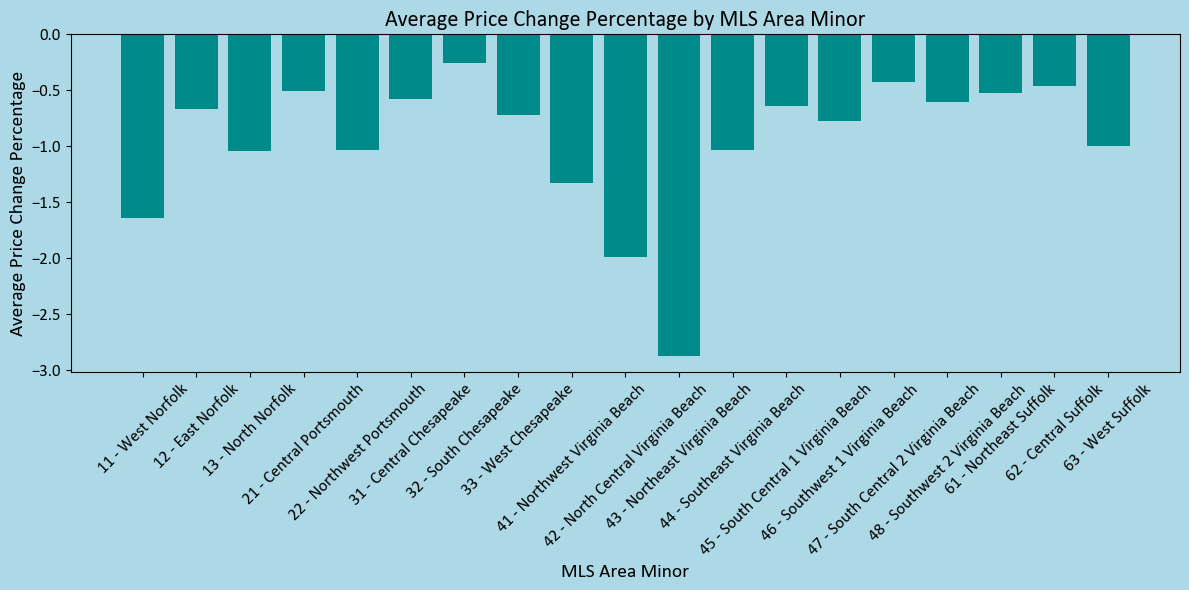

In [133]:
# Group by 'MLS_AREA_MINOR' and calculate average 'PRICE_CHANGE_PERCENT'
avg_price_change = filtered_df.groupby('MLS_AREA_MINOR')['PRICE_CHANGE_PERCENT'].mean().reset_index()

# Set font to Georgia
plt.rcParams['font.family'] = 'Calibri'

# Plot a bar graph with color based on 'PRICE_CHANGE_PERCENT'
fig, ax = plt.figure(figsize=(12, 6)), plt.gca()

# Set the background color of the plot area and the figure
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('lightblue')

# Plot the bar graph
plt.bar(avg_price_change['MLS_AREA_MINOR'], avg_price_change['PRICE_CHANGE_PERCENT'], color='darkcyan')

# Label the axes and add a title
plt.xlabel('MLS Area Minor', fontsize=14)
plt.ylabel('Average Price Change Percentage', fontsize=14)
plt.title('Average Price Change Percentage by MLS Area Minor', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('avg_price_change_MLS_MINOR.png')
plt.show()

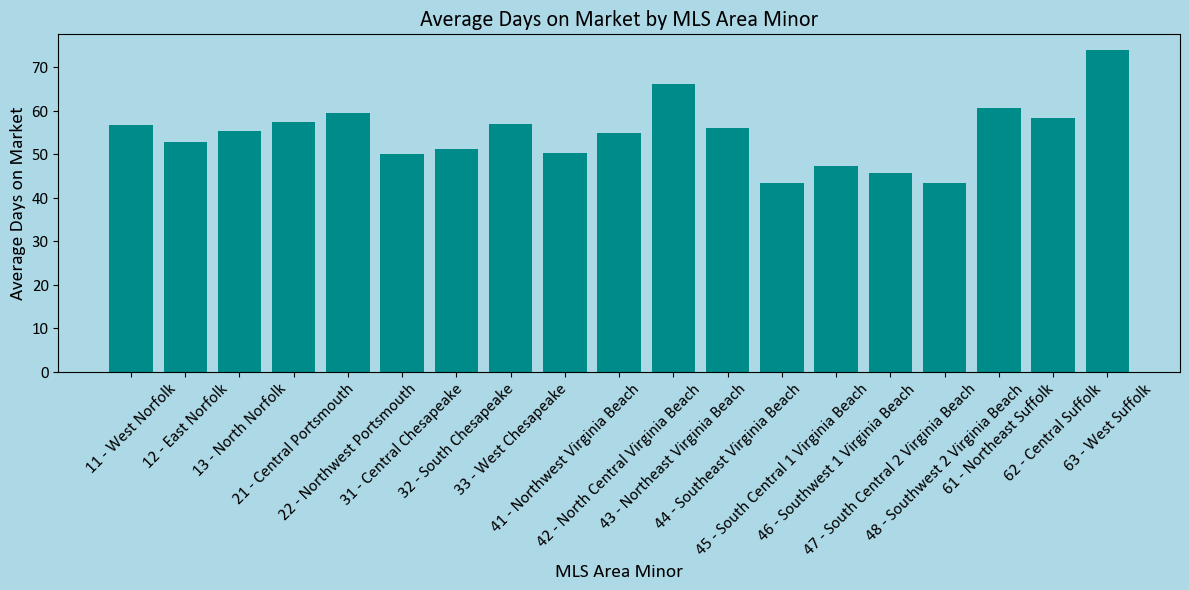

In [217]:
# Group by 'MLS_AREA_MINOR' and calculate average 'Days on Market'
avg_days_on_market = filtered_df.groupby('MLS_AREA_MINOR')['DAYS_ON_MARKET'].mean().reset_index()

# Set font to Georgia
plt.rcParams['font.family'] = 'Calibri'

# Plot a bar graph with color based on 'Days on Market'
fig, ax = plt.figure(figsize=(12, 6)), plt.gca()

# Set the background color of the plot area and the figure
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('lightblue')

# Plot the bar graph
plt.bar(avg_days_on_market['MLS_AREA_MINOR'], avg_days_on_market['DAYS_ON_MARKET'], color='darkcyan')

# Label the axes and add a title
plt.xlabel('MLS Area Minor', fontsize=14)
plt.ylabel('Average Days on Market', fontsize=14)
plt.title('Average Days on Market by MLS Area Minor', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('avg_days_on_market_MLS_MINOR.png')
plt.show()

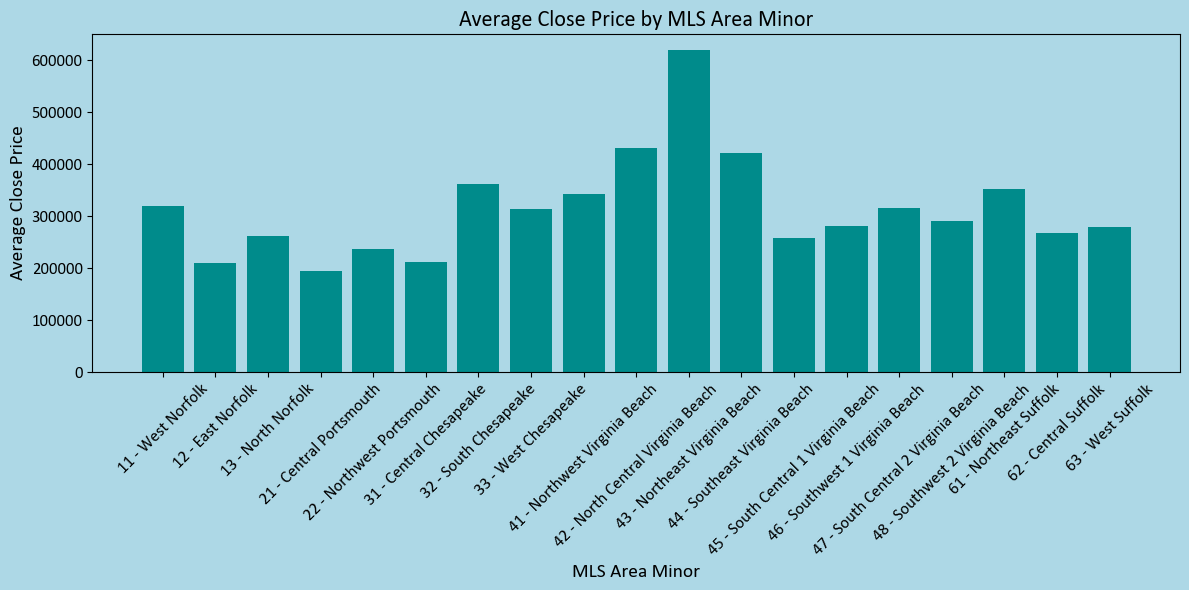

In [219]:
# Group by 'MLS_AREA_MINOR' and calculate average 'Close Price'
avg_close_price = filtered_df.groupby('MLS_AREA_MINOR')['CLOSE_PRICE'].mean().reset_index()

# Set font to Georgia
plt.rcParams['font.family'] = 'Calibri'

# Plot a bar graph with color based on 'Close Price'
fig, ax = plt.figure(figsize=(12, 6)), plt.gca()

# Set the background color of the plot area and the figure
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('lightblue')

# Plot the bar graph
plt.bar(avg_close_price['MLS_AREA_MINOR'], avg_close_price['CLOSE_PRICE'], color='darkcyan')

# Label the axes and add a title
plt.xlabel('MLS Area Minor', fontsize=14)
plt.ylabel('Average Close Price', fontsize=14)
plt.title('Average Close Price by MLS Area Minor', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('avg_close_price_MLS_MINOR.png')
plt.show()

In [135]:
south_peake_df = filtered_df[filtered_df['MLS_AREA_MINOR'] == '32 - South Chesapeake']

In [137]:
south_peake_df

,LISTING_ID,CITY,POSTAL_CODE,MLS_AREA_MINOR,SUBDIVISION,ON_MARKET_DATE,PURCHASE_CONTRACT_DATE,CLOSE_DATE,DAYS_ON_MARKET,LIST_PRICE,CLOSE_PRICE,ON_MARKET_MONTH,CLOSE_MONTH,PRICE_CHANGE,PRICE_CHANGE_PERCENT,ON_MARKET_YEAR
9,400419,Chesapeake,23322,32 - South Chesapeake,GREAT BRIDGE,2004-01-07,2004-01-13,2004-04-02,5,391360,396660,01,2004-04-01,5300,1.354252,2004
10,418148,Chesapeake,23322,32 - South Chesapeake,RAVENNA,2004-06-23,2004-09-28,2004-11-30,93,480000,470000,06,2004-11-01,-10000,-2.083333,2004
11,406817,Chesapeake,23322,32 - South Chesapeake,RAVENNA,2004-03-14,2004-03-15,2004-07-30,1,419715,426679,03,2004-07-01,6964,1.659221,2004
12,409430,Chesapeake,23322,32 - South Chesapeake,RAVENNA,2004-04-07,2004-04-08,2004-10-24,0,453325,469700,04,2004-10-01,16375,3.612199,2004
16,430637,Chesapeake,23320,32 - South Chesapeake,KNELLS RIDGE,2004-10-18,2004-10-26,2004-11-23,2,289900,295000,10,2004-11-01,5100,1.759227,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246460,10484573,Chesapeake,23323,32 - South Chesapeake,ALL OTHERS,2023-05-02,2023-05-16,2023-06-02,11,530000,550000,05,2023-06-01,20000,3.773585,2023
246461,10461003,Chesapeake,23323,32 - South Chesapeake,ALL OTHERS,2022-10-17,2023-01-17,2023-01-16,62,319500,315000,10,2023-01-01,-4500,-1.408451,2022
246462,10491285,Chesapeake,23322,32 - South Chesapeake,ALL OTHERS,2023-06-16,2023-06-28,2023-08-07,11,650000,660000,06,2023-08-01,10000,1.538462,2023
246463,10491758,Chesapeake,23322,32 - South Chesapeake,ALL OTHERS,2023-06-21,2023-07-12,2023-07-20,9,550000,545000,06,2023-07-01,-5000,-0.909091,2023


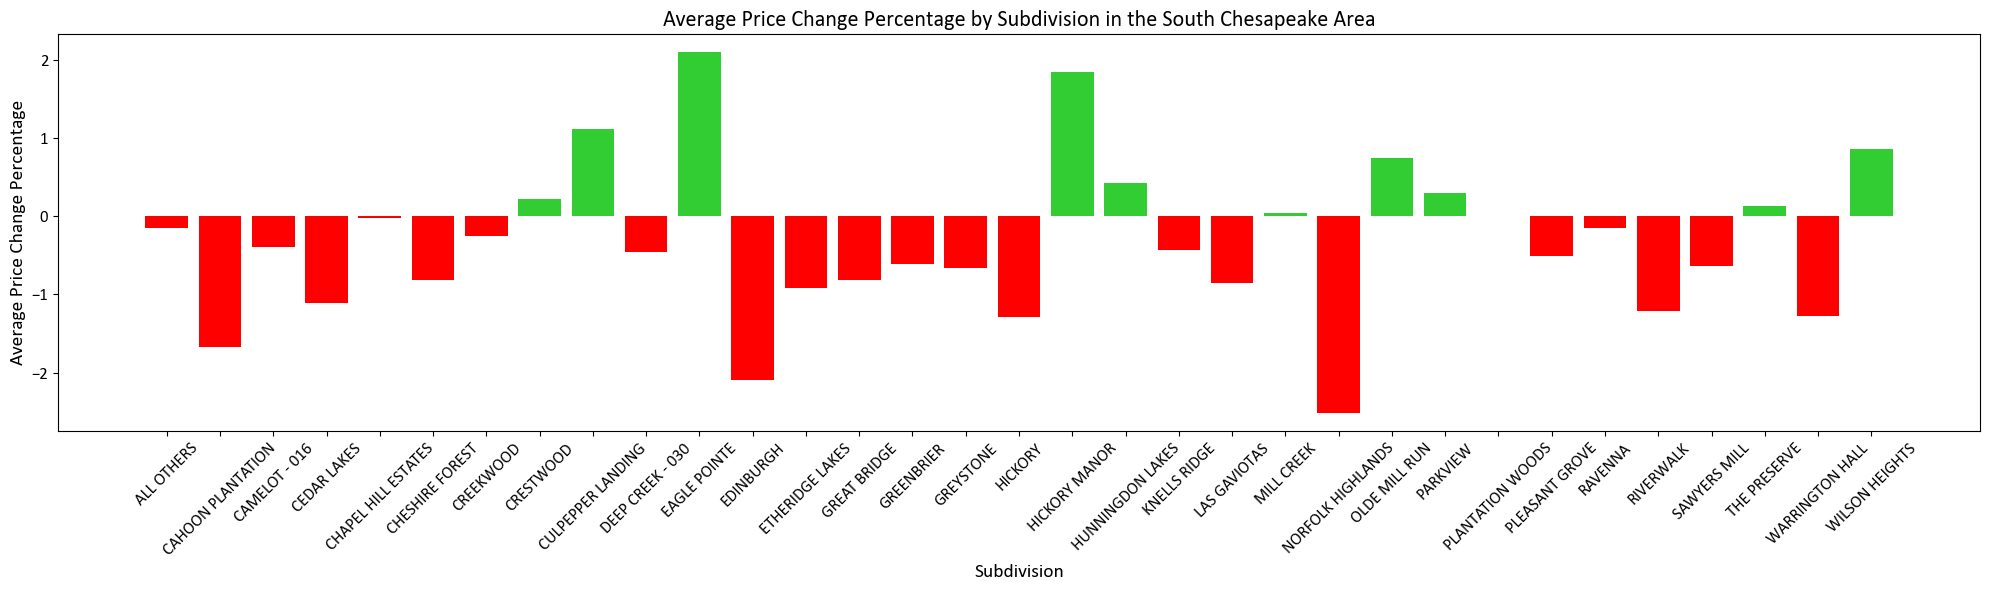

In [139]:
# Group by 'MLS_AREA_MINOR' and calculate average 'PRICE_CHANGE_PERCENT'
avg_price_change = south_peake_df.groupby('SUBDIVISION')['PRICE_CHANGE_PERCENT'].mean().reset_index()


# Set font to Georgia
plt.rcParams['font.family'] = 'Calibri'

# Plot a bar graph with color based on 'PRICE_CHANGE_PERCENT'
plt.figure(figsize=(20, 6))

# Define colors based on sign of PRICE_CHANGE_PERCENT
colors = ['limegreen' if x >= 0 else 'red' for x in avg_price_change['PRICE_CHANGE_PERCENT']]

plt.bar(avg_price_change['SUBDIVISION'], avg_price_change['PRICE_CHANGE_PERCENT'], 
        color=colors)

plt.xlabel('Subdivision', fontsize=14)
plt.ylabel('Average Price Change Percentage', fontsize=14)
plt.title('Average Price Change Percentage by Subdivision in the South Chesapeake Area', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [141]:
eagle_point_df = south_peake_df[south_peake_df['SUBDIVISION'] == 'EAGLE POINTE']

In [143]:
eagle_point_df

,LISTING_ID,CITY,POSTAL_CODE,MLS_AREA_MINOR,SUBDIVISION,ON_MARKET_DATE,PURCHASE_CONTRACT_DATE,CLOSE_DATE,DAYS_ON_MARKET,LIST_PRICE,CLOSE_PRICE,ON_MARKET_MONTH,CLOSE_MONTH,PRICE_CHANGE,PRICE_CHANGE_PERCENT,ON_MARKET_YEAR
17792,510719,Chesapeake,23322,32 - South Chesapeake,EAGLE POINTE,2005-02-02,2005-04-13,2005-11-21,1,346000,373303,02,2005-11-01,27303,7.891040,2005
27307,510772,Chesapeake,23322,32 - South Chesapeake,EAGLE POINTE,2005-02-05,2005-04-13,2005-09-19,1,341000,363990,02,2005-09-01,22990,6.741935,2005
28060,619681,Chesapeake,23322,32 - South Chesapeake,EAGLE POINTE,2006-05-08,2006-05-08,2006-12-21,0,369500,409584,05,2006-12-01,40084,10.848173,2006
28063,541090,Chesapeake,23322,32 - South Chesapeake,EAGLE POINTE,2005-12-16,2005-12-16,2006-11-27,0,369500,454577,12,2006-11-01,85077,23.024899,2005
28065,541088,Chesapeake,23322,32 - South Chesapeake,EAGLE POINTE,2005-12-16,2005-12-16,2006-10-25,0,369500,415869,12,2006-10-01,46369,12.549120,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237841,10491214,Chesapeake,23322,32 - South Chesapeake,EAGLE POINTE,2023-06-16,2023-06-29,2023-08-15,1,495000,500000,06,2023-08-01,5000,1.010101,2023
237842,10498541,Chesapeake,23322,32 - South Chesapeake,EAGLE POINTE,2023-08-10,2023-08-24,2023-09-26,4,439900,439900,08,2023-09-01,0,0.000000,2023
239023,10505258,Chesapeake,23322,32 - South Chesapeake,EAGLE POINTE,2023-10-02,2023-10-09,2023-10-20,4,449000,449000,10,2023-10-01,0,0.000000,2023
241368,10492992,Chesapeake,23322,32 - South Chesapeake,EAGLE POINTE,2023-06-30,2023-07-28,2023-08-15,18,465000,465000,06,2023-08-01,0,0.000000,2023


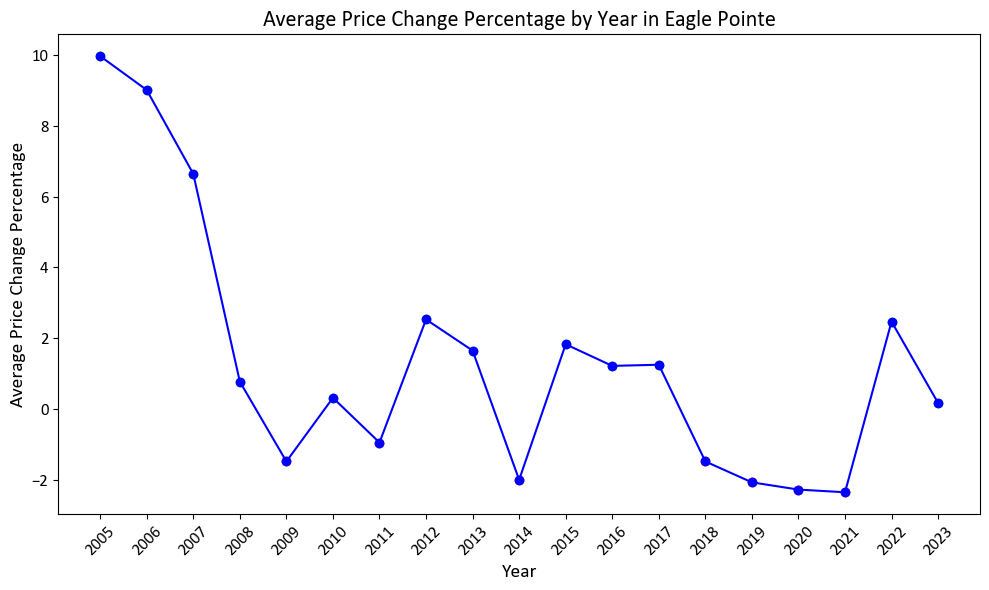

In [145]:
# Group by year and calculate average PRICE_CHANGE_PERCENT
avg_price_change_year = eagle_point_df.groupby('ON_MARKET_YEAR')['PRICE_CHANGE_PERCENT'].mean().reset_index()

# Set font to Georgia
plt.rcParams['font.family'] = 'Calibri'

# Plot a line graph with color based on 'PRICE_CHANGE_PERCENT'
plt.figure(figsize=(10, 6))

# Define colors based on sign of PRICE_CHANGE_PERCENT
colors = ['limegreen' if x >= 0 else 'red' for x in avg_price_change_year['PRICE_CHANGE_PERCENT']]

# Plot the average price change by year
plt.plot(avg_price_change_year['ON_MARKET_YEAR'], avg_price_change_year['PRICE_CHANGE_PERCENT'], marker='o', color='blue')

# Highlight positive and negative points
for i, (year, price_change) in enumerate(zip(avg_price_change_year['ON_MARKET_YEAR'], avg_price_change_year['PRICE_CHANGE_PERCENT'])):
    plt.scatter(year, price_change, color=colors[i])

plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price Change Percentage', fontsize=14)
plt.title('Average Price Change Percentage by Year in Eagle Pointe', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [147]:
hic_mnr_df = south_peake_df[south_peake_df['SUBDIVISION'] == 'HICKORY MANOR']

In [149]:
hic_mnr_df

,LISTING_ID,CITY,POSTAL_CODE,MLS_AREA_MINOR,SUBDIVISION,ON_MARKET_DATE,PURCHASE_CONTRACT_DATE,CLOSE_DATE,DAYS_ON_MARKET,LIST_PRICE,CLOSE_PRICE,ON_MARKET_MONTH,CLOSE_MONTH,PRICE_CHANGE,PRICE_CHANGE_PERCENT,ON_MARKET_YEAR
207432,10379486,Chesapeake,23322,32 - South Chesapeake,HICKORY MANOR,2021-05-26,2021-08-19,2021-12-23,84,511690,537775,05,2021-12-01,26085,5.097813,2021
220146,10393662,Chesapeake,23322,32 - South Chesapeake,HICKORY MANOR,2021-08-04,2021-08-30,2021-12-30,25,489900,524060,08,2021-12-01,34160,6.972852,2021
220693,10450666,Chesapeake,23322,32 - South Chesapeake,HICKORY MANOR,2022-08-04,2022-08-29,2022-09-23,23,585000,565000,08,2022-09-01,-20000,-3.418803,2022
221361,10420483,Chesapeake,23322,32 - South Chesapeake,HICKORY MANOR,2022-02-03,2022-02-23,2022-03-07,13,574900,574900,02,2022-03-01,0,0.000000,2022
222550,10409144,Chesapeake,23322,32 - South Chesapeake,HICKORY MANOR,2021-11-01,2022-01-03,2022-02-18,62,602915,615345,11,2022-02-01,12430,2.061650,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245115,10451438,Chesapeake,23322,32 - South Chesapeake,HICKORY MANOR,2022-08-05,2022-10-31,2023-01-23,85,479900,507360,08,2023-01-01,27460,5.722025,2022
245116,10468748,Chesapeake,23322,32 - South Chesapeake,HICKORY MANOR,2023-01-03,2023-02-13,2023-04-07,41,519900,534440,01,2023-04-01,14540,2.796692,2023
245117,10470689,Chesapeake,23322,32 - South Chesapeake,HICKORY MANOR,2023-01-19,2023-01-20,2023-05-19,1,619190,626155,01,2023-05-01,6965,1.124857,2023
245118,10473474,Chesapeake,23322,32 - South Chesapeake,HICKORY MANOR,2023-02-03,2023-05-19,2023-07-12,104,559230,567580,02,2023-07-01,8350,1.493124,2023


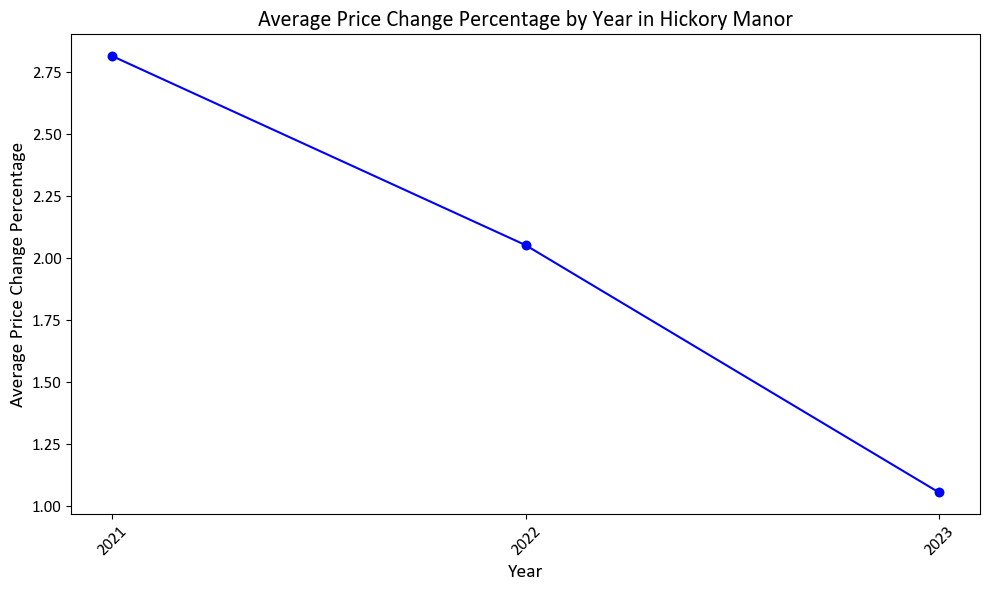

In [151]:
# Group by year and calculate average PRICE_CHANGE_PERCENT
avg_price_change_year = hic_mnr_df.groupby('ON_MARKET_YEAR')['PRICE_CHANGE_PERCENT'].mean().reset_index()

# Set font to Georgia
plt.rcParams['font.family'] = 'Calibri'

# Plot a line graph with color based on 'PRICE_CHANGE_PERCENT'
plt.figure(figsize=(10, 6))

# Define colors based on sign of PRICE_CHANGE_PERCENT
colors = ['limegreen' if x >= 0 else 'red' for x in avg_price_change_year['PRICE_CHANGE_PERCENT']]

# Plot the average price change by year
plt.plot(avg_price_change_year['ON_MARKET_YEAR'], avg_price_change_year['PRICE_CHANGE_PERCENT'], marker='o', color='blue')

# Highlight positive and negative points
for i, (year, price_change) in enumerate(zip(avg_price_change_year['ON_MARKET_YEAR'], avg_price_change_year['PRICE_CHANGE_PERCENT'])):
    plt.scatter(year, price_change, color=colors[i])

plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price Change Percentage', fontsize=14)
plt.title('Average Price Change Percentage by Year in Hickory Manor', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [153]:
sth_cen2_vb_df = filtered_df[filtered_df['MLS_AREA_MINOR'] == '47 - South Central 2 Virginia Beach']

In [155]:
sth_cen2_vb_df

,LISTING_ID,CITY,POSTAL_CODE,MLS_AREA_MINOR,SUBDIVISION,ON_MARKET_DATE,PURCHASE_CONTRACT_DATE,CLOSE_DATE,DAYS_ON_MARKET,LIST_PRICE,CLOSE_PRICE,ON_MARKET_MONTH,CLOSE_MONTH,PRICE_CHANGE,PRICE_CHANGE_PERCENT,ON_MARKET_YEAR
99,400493,Virginia Beach,23456,47 - South Central 2 Virginia Beach,SALEM WOODS,2004-01-07,2004-02-03,2004-03-30,14,269900,268000,01,2004-03-01,-1900,-0.703964,2004
209,431915,Virginia Beach,23456,47 - South Central 2 Virginia Beach,COURTHOUSE ESTATES - 484,2004-10-31,2004-11-29,2004-12-03,27,284900,284900,10,2004-12-01,0,0.000000,2004
210,429361,Virginia Beach,23456,47 - South Central 2 Virginia Beach,GLENWOOD - 418,2004-10-05,2004-11-03,2004-11-19,29,265000,265000,10,2004-11-01,0,0.000000,2004
211,425428,Virginia Beach,23456,47 - South Central 2 Virginia Beach,SALEM WOODS,2004-08-26,2004-09-06,2004-10-01,7,254900,255000,08,2004-10-01,100,0.039231,2004
212,416087,Virginia Beach,23456,47 - South Central 2 Virginia Beach,BUCKNER FARM,2004-06-04,2004-07-01,2004-07-12,24,279000,279000,06,2004-07-01,0,0.000000,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246311,10460987,Virginia Beach,23456,47 - South Central 2 Virginia Beach,ALL OTHERS,2022-10-17,2023-01-15,2023-05-11,89,640264,668069,10,2023-05-01,27805,4.342740,2022
246325,10493593,Virginia Beach,23456,47 - South Central 2 Virginia Beach,ALL OTHERS,2023-07-06,2023-09-06,2023-08-30,32,599800,595000,07,2023-08-01,-4800,-0.800267,2023
246328,10497953,Virginia Beach,23456,47 - South Central 2 Virginia Beach,ALL OTHERS,2023-08-05,2023-08-19,2023-09-06,1,415000,425000,08,2023-09-01,10000,2.409639,2023
246349,10474465,Virginia Beach,23453,47 - South Central 2 Virginia Beach,ALL OTHERS,2023-02-10,2023-03-22,2023-04-12,38,280000,285000,02,2023-04-01,5000,1.785714,2023


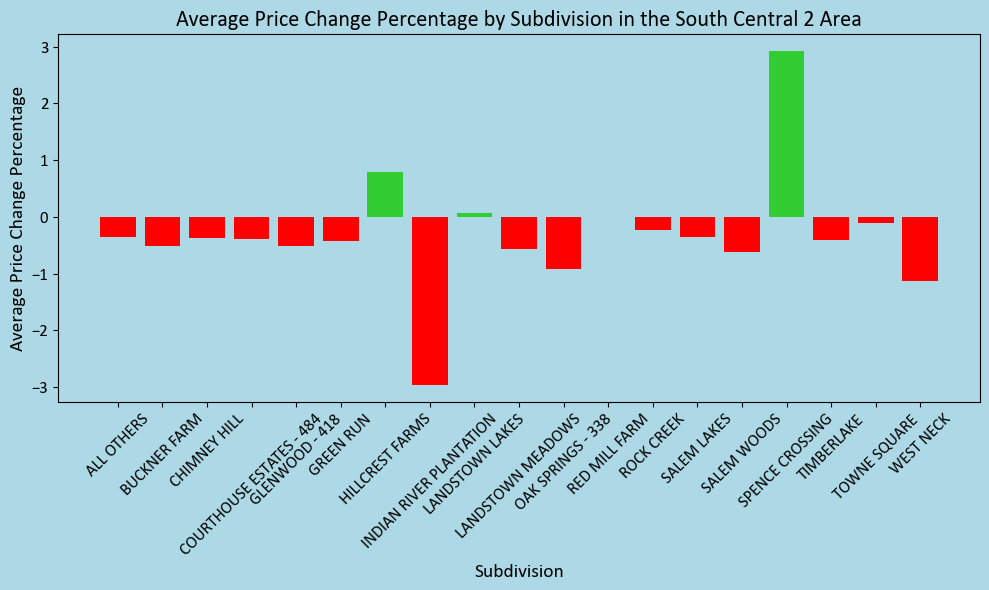

In [205]:
# Group by 'MLS_AREA_MINOR' and calculate average 'PRICE_CHANGE_PERCENT'
avg_price_change = sth_cen2_vb_df.groupby('SUBDIVISION')['PRICE_CHANGE_PERCENT'].mean().reset_index()


# Set font to Georgia
plt.rcParams['font.family'] = 'Calibri'

fig, ax = plt.figure(figsize=(10, 6)), plt.gca()

# Set the background color of the plot area and the figure
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('lightblue')

# Define colors based on sign of PRICE_CHANGE_PERCENT
colors = ['limegreen' if x >= 0 else 'red' for x in avg_price_change['PRICE_CHANGE_PERCENT']]

plt.bar(avg_price_change['SUBDIVISION'], avg_price_change['PRICE_CHANGE_PERCENT'], 
        color=colors)

plt.xlabel('Subdivision', fontsize=14)
plt.ylabel('Average Price Change Percentage', fontsize=14)
plt.title('Average Price Change Percentage by Subdivision in the South Central 2 Area', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('avg_price_change_south_central2.png')
plt.show()

In [159]:
spence_df = sth_cen2_vb_df[sth_cen2_vb_df['SUBDIVISION'] == 'SPENCE CROSSING']

In [161]:
spence_df

,LISTING_ID,CITY,POSTAL_CODE,MLS_AREA_MINOR,SUBDIVISION,ON_MARKET_DATE,PURCHASE_CONTRACT_DATE,CLOSE_DATE,DAYS_ON_MARKET,LIST_PRICE,CLOSE_PRICE,ON_MARKET_MONTH,CLOSE_MONTH,PRICE_CHANGE,PRICE_CHANGE_PERCENT,ON_MARKET_YEAR
132767,1628494,Virginia Beach,23456,47 - South Central 2 Virginia Beach,SPENCE CROSSING,2016-06-05,2016-06-09,2016-07-29,0,369900,393260,06,2016-07-01,23360,6.315220,2016
132768,1651564,Virginia Beach,23456,47 - South Central 2 Virginia Beach,SPENCE CROSSING,2016-10-18,2016-10-28,2016-12-20,0,364900,373965,10,2016-12-01,9065,2.484242,2016
132769,1610583,Virginia Beach,23456,47 - South Central 2 Virginia Beach,SPENCE CROSSING,2016-03-02,2016-03-04,2016-04-29,0,379900,391685,03,2016-04-01,11785,3.102132,2016
134695,1628506,Virginia Beach,23456,47 - South Central 2 Virginia Beach,SPENCE CROSSING,2016-06-05,2016-06-09,2016-09-26,37,387355,412480,06,2016-09-01,25125,6.486298,2016
134696,1620439,Virginia Beach,23456,47 - South Central 2 Virginia Beach,SPENCE CROSSING,2016-04-28,2016-06-24,2016-10-11,55,366125,361945,04,2016-10-01,-4180,-1.141687,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238238,10485074,Virginia Beach,23456,47 - South Central 2 Virginia Beach,SPENCE CROSSING,2023-05-11,2023-06-14,2023-06-12,5,530000,530000,05,2023-06-01,0,0.000000,2023
241711,10470906,Virginia Beach,23456,47 - South Central 2 Virginia Beach,SPENCE CROSSING,2023-01-20,2023-01-28,2023-02-28,8,560000,567500,01,2023-02-01,7500,1.339286,2023
245491,10490162,Virginia Beach,23456,47 - South Central 2 Virginia Beach,SPENCE CROSSING,2023-06-16,2023-07-11,2023-07-21,4,560000,585000,06,2023-07-01,25000,4.464286,2023
245492,10475825,Virginia Beach,23456,47 - South Central 2 Virginia Beach,SPENCE CROSSING,2023-02-23,2023-03-16,2023-03-24,2,560000,580000,02,2023-03-01,20000,3.571429,2023


In [163]:
spence_df.describe()  

,LISTING_ID,ON_MARKET_DATE,PURCHASE_CONTRACT_DATE,CLOSE_DATE,DAYS_ON_MARKET,LIST_PRICE,CLOSE_PRICE,CLOSE_MONTH,PRICE_CHANGE,PRICE_CHANGE_PERCENT
count,2.240000e+02,224,224,224,224.000000,224.000000,224.000000,224,224.000000,224.000000
mean,9.188165e+06,2019-03-05 06:00:00,2019-03-21 04:10:42.857142784,2019-07-03 01:17:08.571428608,13.200893,422119.491071,433958.236607,2019-06-17 07:42:51.428571392,11838.745536,2.922359
min,1.554131e+06,2015-11-25 00:00:00,2015-11-30 00:00:00,2016-03-31 00:00:00,0.000000,339900.000000,347910.000000,2016-03-01 00:00:00,-20000.000000,-4.887218
25%,1.015621e+07,2017-10-05 12:00:00,2017-10-14 06:00:00,2018-04-15 18:00:00,1.000000,384013.750000,395025.000000,2018-04-01 00:00:00,3745.000000,0.923990
50%,1.025605e+07,2019-04-30 00:00:00,2019-05-16 00:00:00,2019-08-09 00:00:00,2.000000,404182.500000,417840.000000,2019-08-01 00:00:00,10690.000000,2.552228
75%,1.031885e+07,2020-05-07 18:00:00,2020-06-08 06:00:00,2020-08-17 18:00:00,6.000000,444150.000000,453737.500000,2020-08-01 00:00:00,17931.250000,4.528532
max,1.050759e+07,2023-10-20 00:00:00,2023-11-17 00:00:00,2023-11-21 00:00:00,243.000000,600000.000000,615000.000000,2023-11-01 00:00:00,48410.000000,12.742827
std,2.864835e+06,NaN,NaN,NaN,31.605752,56554.353616,55017.744390,NaN,11416.533468,2.832134


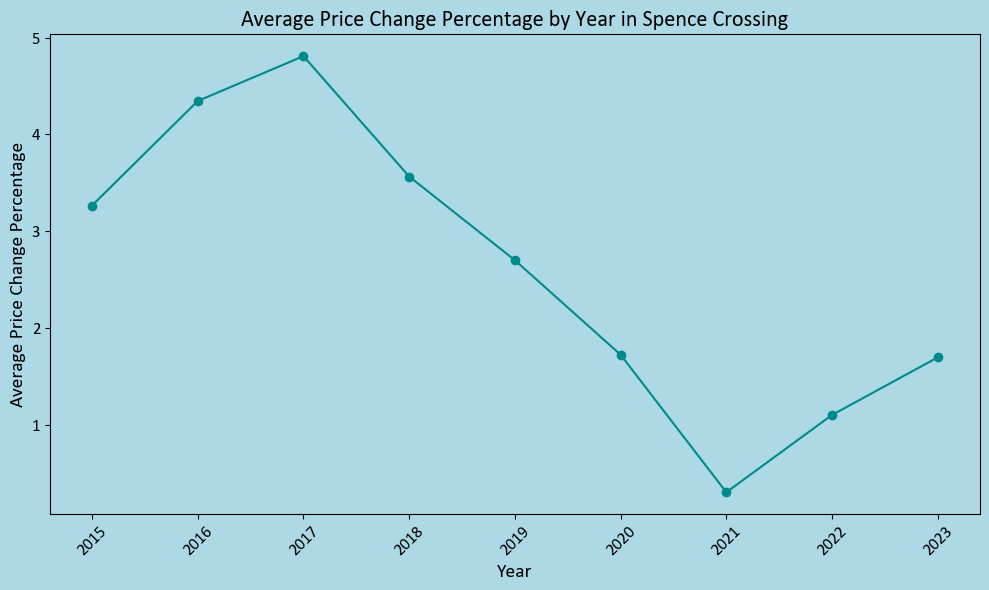

In [201]:
# Group by year and calculate average PRICE_CHANGE_PERCENT
avg_price_change_year = spence_df.groupby('ON_MARKET_YEAR')['PRICE_CHANGE_PERCENT'].mean().reset_index()

# Set font to Georgia
plt.rcParams['font.family'] = 'Calibri'

fig, ax = plt.figure(figsize=(10, 6)), plt.gca()

# Set the background color of the plot area and the figure
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('lightblue')

# Plot the average price change by year
plt.plot(avg_price_change_year['ON_MARKET_YEAR'], avg_price_change_year['PRICE_CHANGE_PERCENT'], marker='o', color='darkcyan')


plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Price Change Percentage', fontsize=14)
plt.title('Average Price Change Percentage by Year in Spence Crossing', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('avg_price_change_spence_crossing.png')
plt.show()

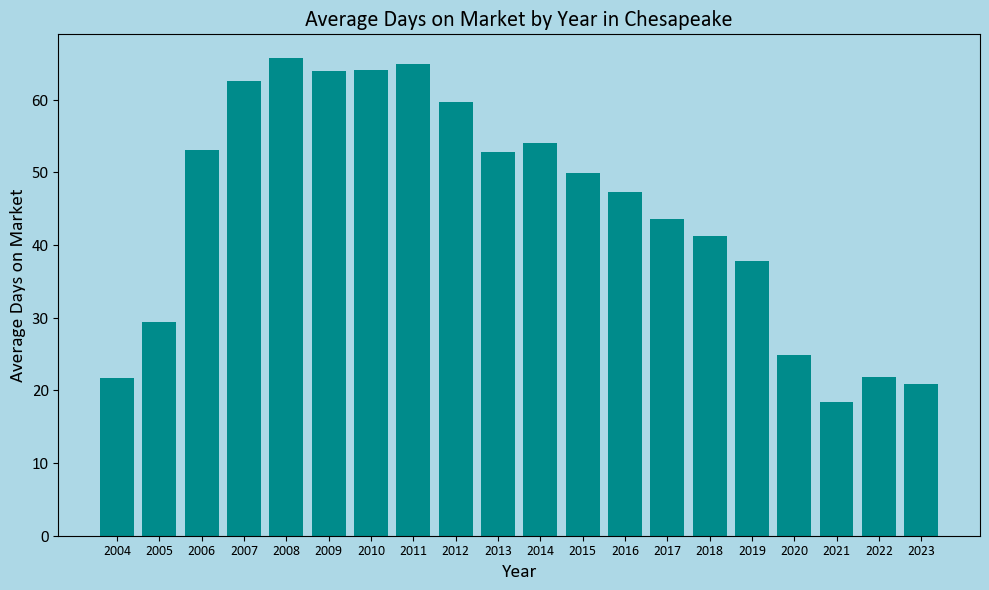

In [167]:
# Group by month and calculate average DAYS_ON_MARKET
avg_days_on_market_chesapeake = chesapeake_df.groupby('ON_MARKET_YEAR')['DAYS_ON_MARKET'].mean().reset_index()

# Set font to Georgia
plt.rcParams['font.family'] = 'Calibri'

fig, ax = plt.figure(figsize=(10, 6)), plt.gca()

# Set the background color of the plot area and the figure
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('lightblue')

# Plot the average days on market by month
plt.bar(avg_days_on_market_chesapeake['ON_MARKET_YEAR'], avg_days_on_market_chesapeake['DAYS_ON_MARKET'], color='darkcyan')

# Label the axes and add a title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Days on Market', fontsize=14)
plt.title('Average Days on Market by Year in Chesapeake', fontsize=16)

plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('avg_days_on_market_chesapeake.png')
plt.show()

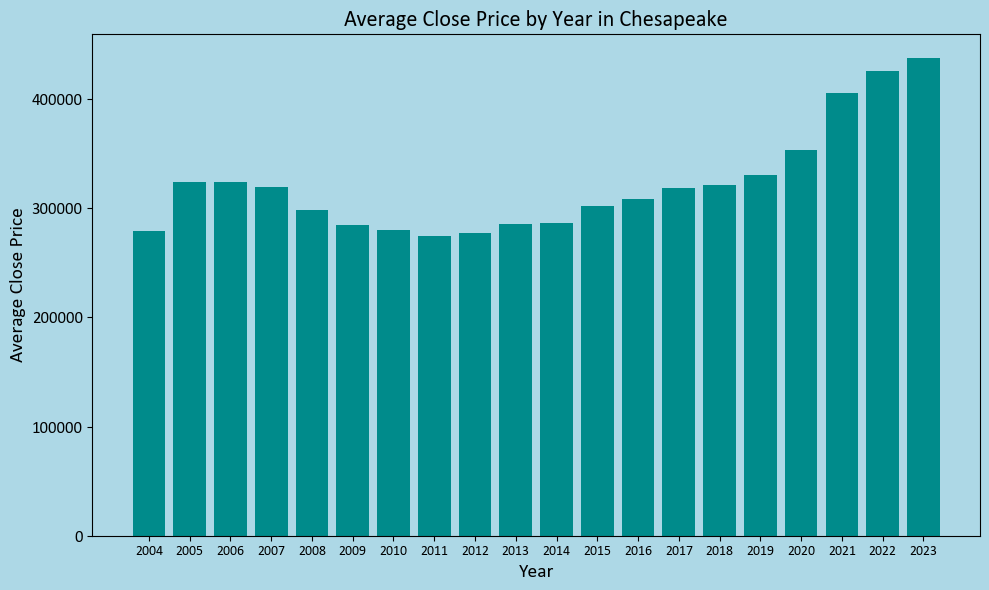

In [169]:
# Group by month and calculate average CLOSE_PRICE
avg_close_price_chesapeake = chesapeake_df.groupby('ON_MARKET_YEAR')['CLOSE_PRICE'].mean().reset_index()

# Set font to Georgia
plt.rcParams['font.family'] = 'Calibri'

fig, ax = plt.figure(figsize=(10, 6)), plt.gca()

# Set the background color of the plot area and the figure
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('lightblue')

# Plot the average days on market by month
plt.bar(avg_close_price_chesapeake['ON_MARKET_YEAR'], avg_close_price_chesapeake['CLOSE_PRICE'], color='darkcyan')

# Label the axes and add a title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Close Price', fontsize=14)
plt.title('Average Close Price by Year in Chesapeake', fontsize=16)

plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('avg_close_price_chesapeake.png')
plt.show()

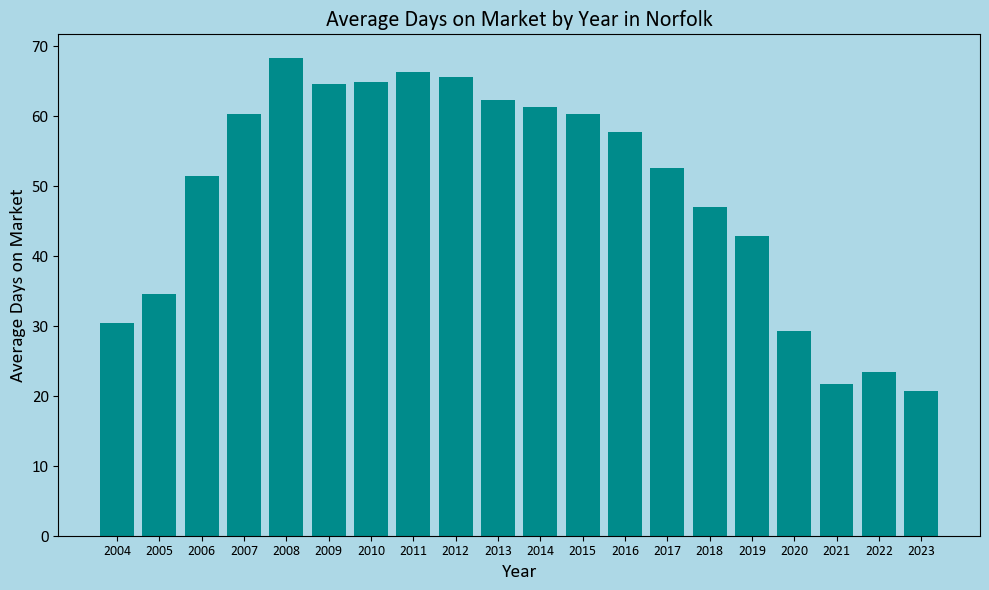

In [171]:
# Group by month and calculate average DAYS_ON_MARKET
avg_days_on_market_norfolk = norfolk_df.groupby('ON_MARKET_YEAR')['DAYS_ON_MARKET'].mean().reset_index()

# Set font to Georgia
plt.rcParams['font.family'] = 'Calibri'

fig, ax = plt.figure(figsize=(10, 6)), plt.gca()

# Set the background color of the plot area and the figure
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('lightblue')

# Plot the average days on market by month
plt.bar(avg_days_on_market_norfolk['ON_MARKET_YEAR'], avg_days_on_market_norfolk['DAYS_ON_MARKET'], color='darkcyan')

# Label the axes and add a title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Days on Market', fontsize=14)
plt.title('Average Days on Market by Year in Norfolk', fontsize=16)

plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('avg_days_on_market_norfolk.png')
plt.show()

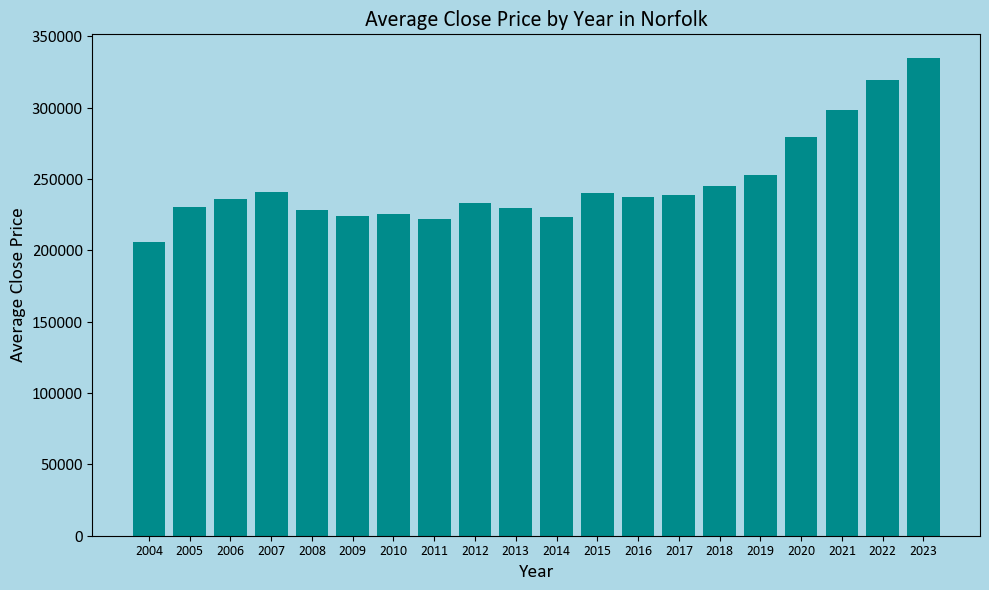

In [173]:
# Group by month and calculate average CLOSE_PRICE
avg_close_price_norfolk = norfolk_df.groupby('ON_MARKET_YEAR')['CLOSE_PRICE'].mean().reset_index()

# Set font to Georgia
plt.rcParams['font.family'] = 'Calibri'

fig, ax = plt.figure(figsize=(10, 6)), plt.gca()

# Set the background color of the plot area and the figure
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('lightblue')

# Plot the average days on market by month
plt.bar(avg_close_price_norfolk['ON_MARKET_YEAR'], avg_close_price_norfolk['CLOSE_PRICE'], color='darkcyan')

# Label the axes and add a title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Close Price', fontsize=14)
plt.title('Average Close Price by Year in Norfolk', fontsize=16)

plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('avg_close_price_norfolk.png')
plt.show()

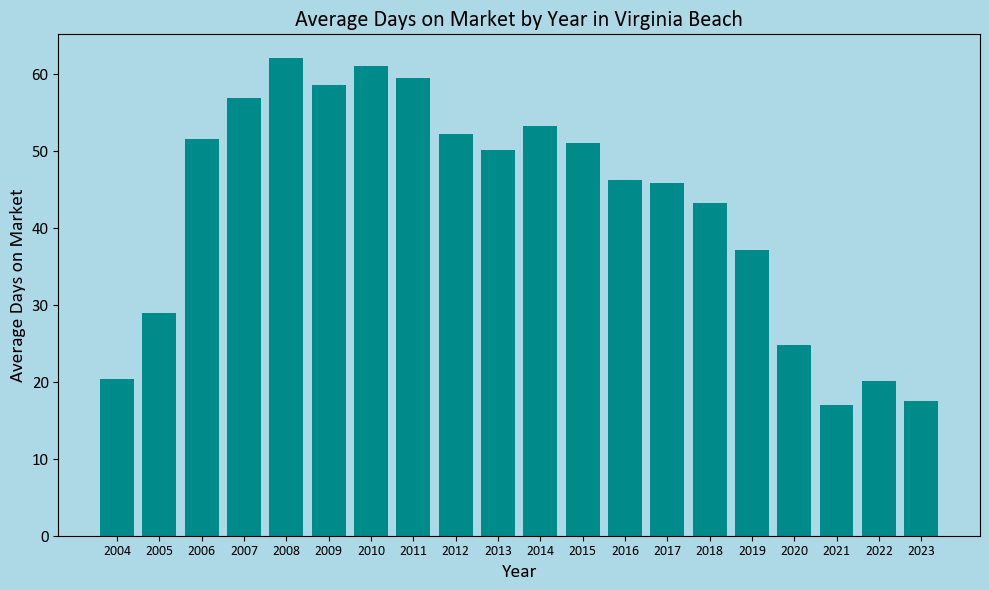

In [175]:
# Group by month and calculate average DAYS_ON_MARKET
avg_days_on_market_vabch = vabch_df.groupby('ON_MARKET_YEAR')['DAYS_ON_MARKET'].mean().reset_index()

# Set font to Georgia
plt.rcParams['font.family'] = 'Calibri'

fig, ax = plt.figure(figsize=(10, 6)), plt.gca()

# Set the background color of the plot area and the figure
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('lightblue')

# Plot the average days on market by month
plt.bar(avg_days_on_market_vabch['ON_MARKET_YEAR'], avg_days_on_market_vabch['DAYS_ON_MARKET'], color='darkcyan')

# Label the axes and add a title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Days on Market', fontsize=14)
plt.title('Average Days on Market by Year in Virginia Beach', fontsize=16)

plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('avg_days_on_market_vb.png')
plt.show()

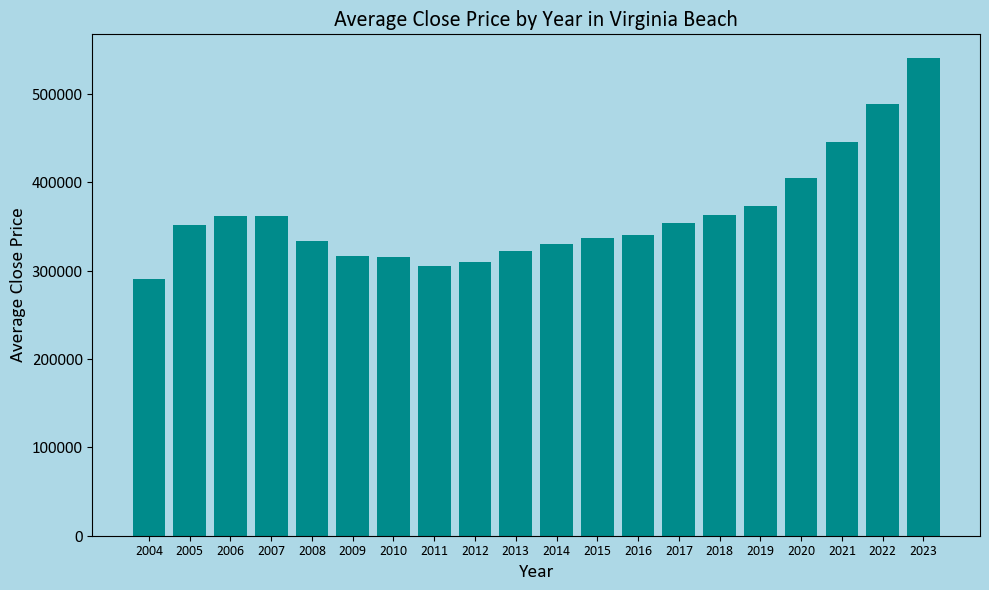

In [177]:
# Group by month and calculate average CLOSE_PRICE
avg_close_price_vabch = vabch_df.groupby('ON_MARKET_YEAR')['CLOSE_PRICE'].mean().reset_index()

# Set font to Georgia
plt.rcParams['font.family'] = 'Calibri'

fig, ax = plt.figure(figsize=(10, 6)), plt.gca()

# Set the background color of the plot area and the figure
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('lightblue')

# Plot the average days on market by month
plt.bar(avg_close_price_vabch['ON_MARKET_YEAR'], avg_close_price_vabch['CLOSE_PRICE'], color='darkcyan')

# Label the axes and add a title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Close Price', fontsize=14)
plt.title('Average Close Price by Year in Virginia Beach', fontsize=16)

plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('avg_close_price_vb.png')
plt.show()

In [179]:
chesapeake_df_2023 = chesapeake_df[chesapeake_df['ON_MARKET_YEAR'] == '2023']

In [181]:
chesapeake_df_2022 = chesapeake_df[chesapeake_df['ON_MARKET_YEAR'] == '2022']

In [183]:
chesapeake_df_2021 = chesapeake_df[chesapeake_df['ON_MARKET_YEAR'] == '2021']

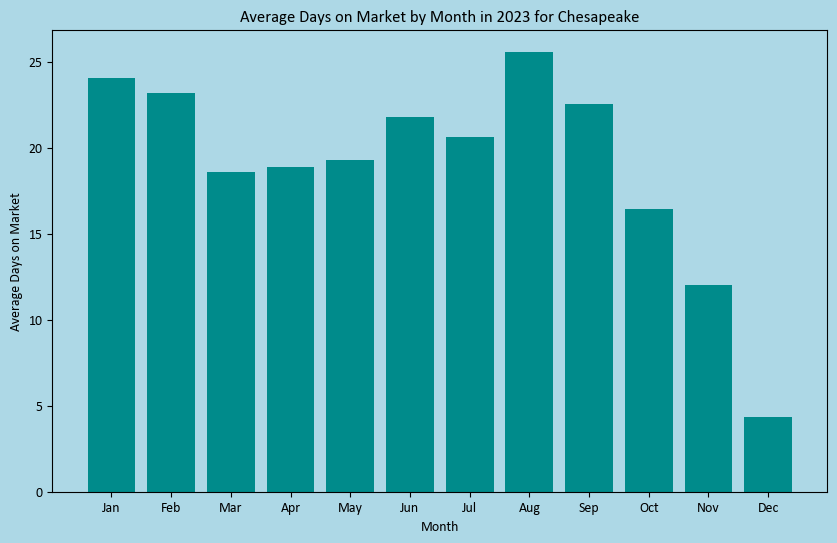

In [185]:
# Calculate the average values by month
avg_days_on_market = chesapeake_df_2023.groupby('ON_MARKET_MONTH')['DAYS_ON_MARKET'].mean()

# Set the font and background color
plt.rcParams['font.family'] = 'Calibri'

fig, ax = plt.figure(figsize=(10, 6)), plt.gca()

# Set the background color of the plot area and the figure
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('lightblue')

# Plot the Average Days on Market as a bar graph
ax.bar(avg_days_on_market.index, avg_days_on_market, label='Average Days on Market', color='darkcyan')

# Set the x-tick labels to the first three letters of each month
month_abbr = [calendar.month_abbr[int(month)] for month in avg_days_on_market.index]
ax.set_xticks(avg_days_on_market.index)
ax.set_xticklabels(month_abbr)

# Add titles and labels
ax.set_title('Average Days on Market by Month in 2023 for Chesapeake')
ax.set_xlabel('Month')
ax.set_ylabel('Average Days on Market')

# Show the plot
plt.show()

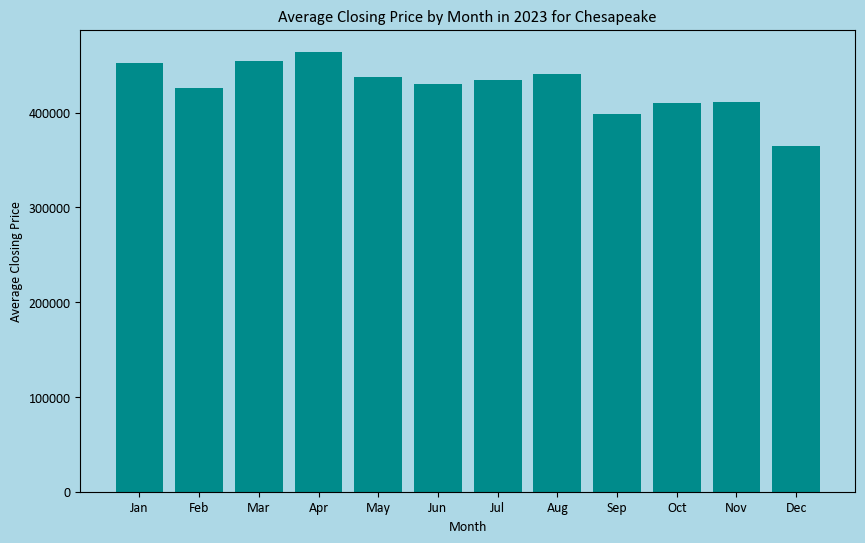

In [187]:
# Calculate the average values by month
avg_close_price = chesapeake_df_2023.groupby('ON_MARKET_MONTH')['CLOSE_PRICE'].mean()

# Set the font and background color
plt.rcParams['font.family'] = 'Calibri'

fig, ax = plt.figure(figsize=(10, 6)), plt.gca()

# Set the background color of the plot area and the figure
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('lightblue')

# Plot the Average Days on Market as a bar graph
ax.bar(avg_close_price.index, avg_close_price, label='Average Closing Price', color='darkcyan')

# Set the x-tick labels to the first three letters of each month
month_abbr = [calendar.month_abbr[int(month)] for month in avg_days_on_market.index]
ax.set_xticks(avg_close_price.index)
ax.set_xticklabels(month_abbr)

# Add titles and labels
ax.set_title('Average Closing Price by Month in 2023 for Chesapeake')
ax.set_xlabel('Month')
ax.set_ylabel('Average Closing Price')

# Show the plot
plt.show()

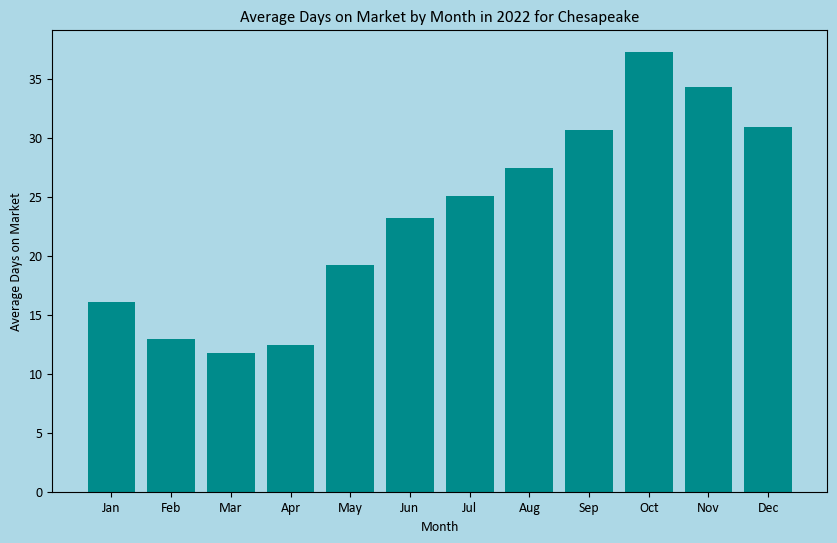

In [189]:
# Calculate the average values by month
avg_days_on_market = chesapeake_df_2022.groupby('ON_MARKET_MONTH')['DAYS_ON_MARKET'].mean()

# Set the font and background color
plt.rcParams['font.family'] = 'Calibri'

fig, ax = plt.figure(figsize=(10, 6)), plt.gca()

# Set the background color of the plot area and the figure
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('lightblue')

# Plot the Average Days on Market as a bar graph
ax.bar(avg_days_on_market.index, avg_days_on_market, label='Average Days on Market', color='darkcyan')

# Set the x-tick labels to the first three letters of each month
month_abbr = [calendar.month_abbr[int(month)] for month in avg_days_on_market.index]
ax.set_xticks(avg_days_on_market.index)
ax.set_xticklabels(month_abbr)

# Add titles and labels
ax.set_title('Average Days on Market by Month in 2022 for Chesapeake')
ax.set_xlabel('Month')
ax.set_ylabel('Average Days on Market')

# Show the plot
plt.show()

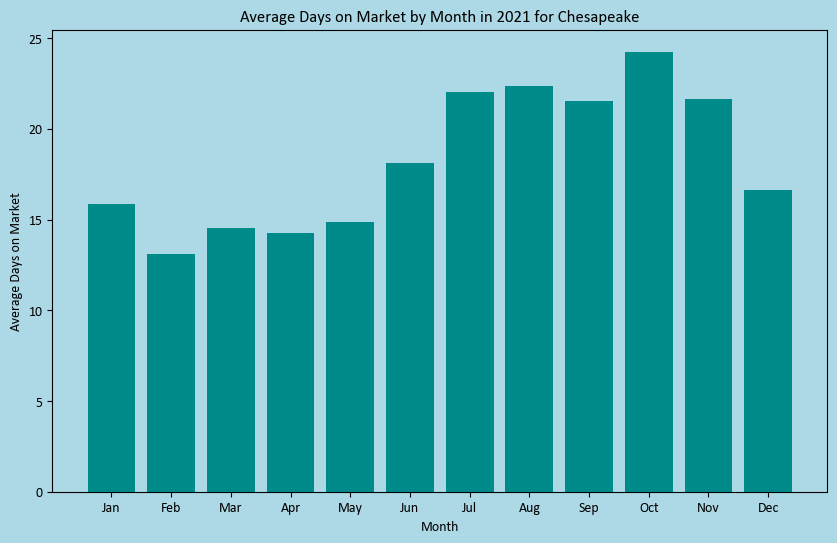

In [191]:
# Calculate the average values by month
avg_days_on_market = chesapeake_df_2021.groupby('ON_MARKET_MONTH')['DAYS_ON_MARKET'].mean()

# Set the font and background color
plt.rcParams['font.family'] = 'Calibri'

fig, ax = plt.figure(figsize=(10, 6)), plt.gca()

# Set the background color of the plot area and the figure
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('lightblue')

# Plot the Average Days on Market as a bar graph
ax.bar(avg_days_on_market.index, avg_days_on_market, label='Average Days on Market', color='darkcyan')

# Set the x-tick labels to the first three letters of each month
month_abbr = [calendar.month_abbr[int(month)] for month in avg_days_on_market.index]
ax.set_xticks(avg_days_on_market.index)
ax.set_xticklabels(month_abbr)

# Add titles and labels
ax.set_title('Average Days on Market by Month in 2021 for Chesapeake')
ax.set_xlabel('Month')
ax.set_ylabel('Average Days on Market')

# Show the plot
plt.show()

In [209]:
spence_df_2023 = spence_df[spence_df['ON_MARKET_YEAR'] == '2023']

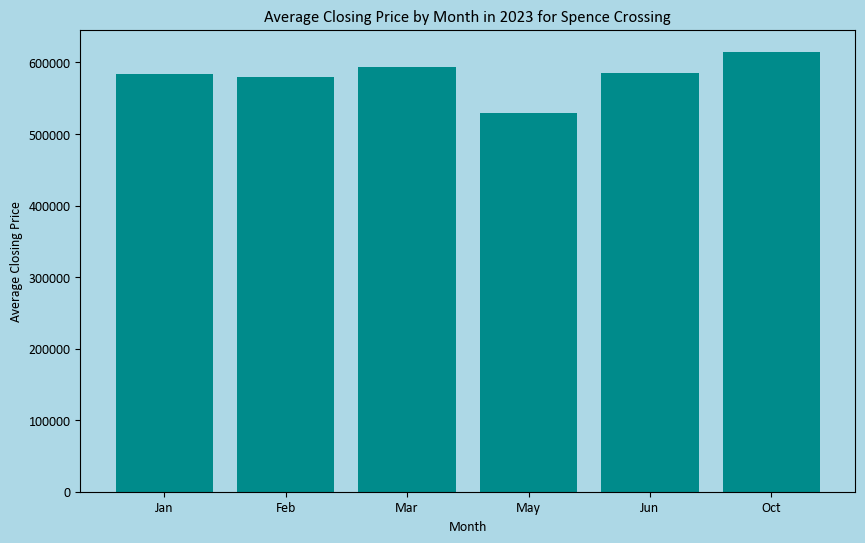

In [213]:
import matplotlib.pyplot as plt
import calendar

# Calculate the average values by month
avg_close_price = spence_df_2023.groupby('ON_MARKET_MONTH')['CLOSE_PRICE'].mean()

# Set the font and background color
plt.rcParams['font.family'] = 'Calibri'

fig, ax = plt.subplots(figsize=(10, 6))

# Set the background color of the plot area and the figure
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('lightblue')

# Plot the Average Days on Market as a bar graph
ax.bar(avg_close_price.index, avg_close_price, label='Average Closing Price', color='darkcyan')

# Set the x-tick labels to the first three letters of each month
month_abbr = [calendar.month_abbr[int(month)] for month in avg_close_price.index]
ax.set_xticks(avg_close_price.index)
ax.set_xticklabels(month_abbr)

# Add titles and labels
ax.set_title('Average Closing Price by Month in 2023 for Spence Crossing')
ax.set_xlabel('Month')
ax.set_ylabel('Average Closing Price')

# Show the plot
plt.show()


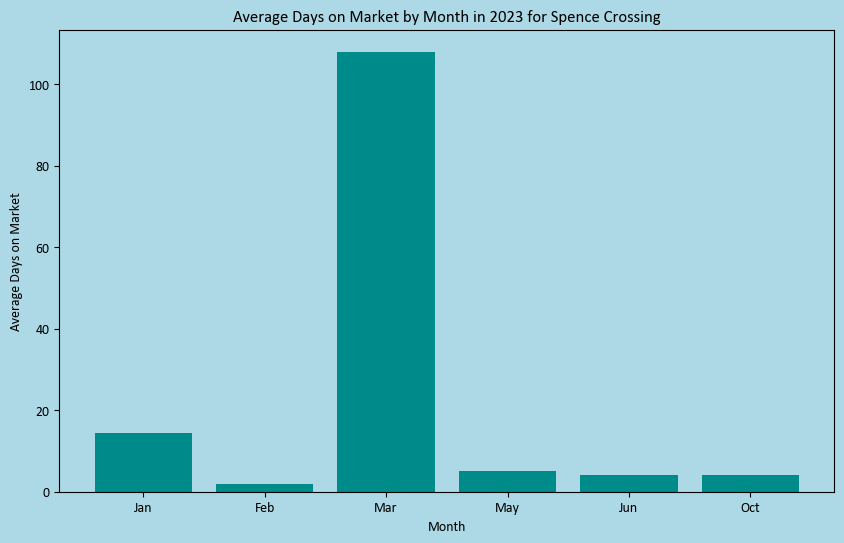

In [215]:
# Calculate the average values by month
avg_days_on_market = spence_df_2023.groupby('ON_MARKET_MONTH')['DAYS_ON_MARKET'].mean()

# Set the font and background color
plt.rcParams['font.family'] = 'Calibri'

fig, ax = plt.figure(figsize=(10, 6)), plt.gca()

# Set the background color of the plot area and the figure
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('lightblue')

# Plot the Average Days on Market as a bar graph
ax.bar(avg_days_on_market.index, avg_days_on_market, label='Average Days on Market', color='darkcyan')

# Set the x-tick labels to the first three letters of each month
month_abbr = [calendar.month_abbr[int(month)] for month in avg_days_on_market.index]
ax.set_xticks(avg_days_on_market.index)
ax.set_xticklabels(month_abbr)

# Add titles and labels
ax.set_title('Average Days on Market by Month in 2023 for Spence Crossing')
ax.set_xlabel('Month')
ax.set_ylabel('Average Days on Market')

# Show the plot
plt.show()

In [269]:
south_cen1_vb_df = filtered_df[filtered_df['MLS_AREA_MINOR'] == '45 - South Central 1 Virginia Beach']

In [271]:
south_cen1_vb_df

,LISTING_ID,CITY,POSTAL_CODE,MLS_AREA_MINOR,SUBDIVISION,ON_MARKET_DATE,PURCHASE_CONTRACT_DATE,CLOSE_DATE,DAYS_ON_MARKET,LIST_PRICE,CLOSE_PRICE,ON_MARKET_MONTH,CLOSE_MONTH,PRICE_CHANGE,PRICE_CHANGE_PERCENT,ON_MARKET_YEAR
1059,402046,Virginia Beach,23452,45 - South Central 1 Virginia Beach,THE LAKES,2004-01-26,2004-03-03,2004-04-09,37,112000,102500,01,2004-04-01,-9500,-8.482143,2004
1076,408916,Virginia Beach,23453,45 - South Central 1 Virginia Beach,MAGIC HOLLOW,2004-03-27,2004-04-02,2004-04-27,1,135000,138000,03,2004-04-01,3000,2.222222,2004
1091,408101,Virginia Beach,23452,45 - South Central 1 Virginia Beach,PRINCESS ANNE PLAZA,2004-03-26,2004-03-29,2004-05-20,1,149900,154000,03,2004-05-01,4100,2.735157,2004
1114,412061,Virginia Beach,23452,45 - South Central 1 Virginia Beach,WINDSOR WOODS,2004-05-01,2004-05-17,2004-05-26,2,205000,207000,05,2004-05-01,2000,0.975610,2004
1138,403961,Virginia Beach,23453,45 - South Central 1 Virginia Beach,MAGIC HOLLOW,2004-02-16,2004-03-02,2004-04-01,7,145000,140000,02,2004-04-01,-5000,-3.448276,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246305,10489900,Virginia Beach,23452,45 - South Central 1 Virginia Beach,WINDSOR WOODS,2023-06-08,2023-06-23,2023-07-21,10,412000,411500,06,2023-07-01,-500,-0.121359,2023
246307,10480539,Virginia Beach,23452,45 - South Central 1 Virginia Beach,PRINCESS ANNE PLAZA,2023-04-04,2023-04-12,2023-05-05,7,295000,295000,04,2023-05-01,0,0.000000,2023
246346,10493987,Virginia Beach,23453,45 - South Central 1 Virginia Beach,ALL OTHERS,2023-07-07,2023-07-13,2023-08-10,6,278500,284000,07,2023-08-01,5500,1.974865,2023
246416,10474427,Virginia Beach,23453,45 - South Central 1 Virginia Beach,ALL OTHERS,2023-02-10,2023-03-13,2023-04-10,19,299900,299900,02,2023-04-01,0,0.000000,2023


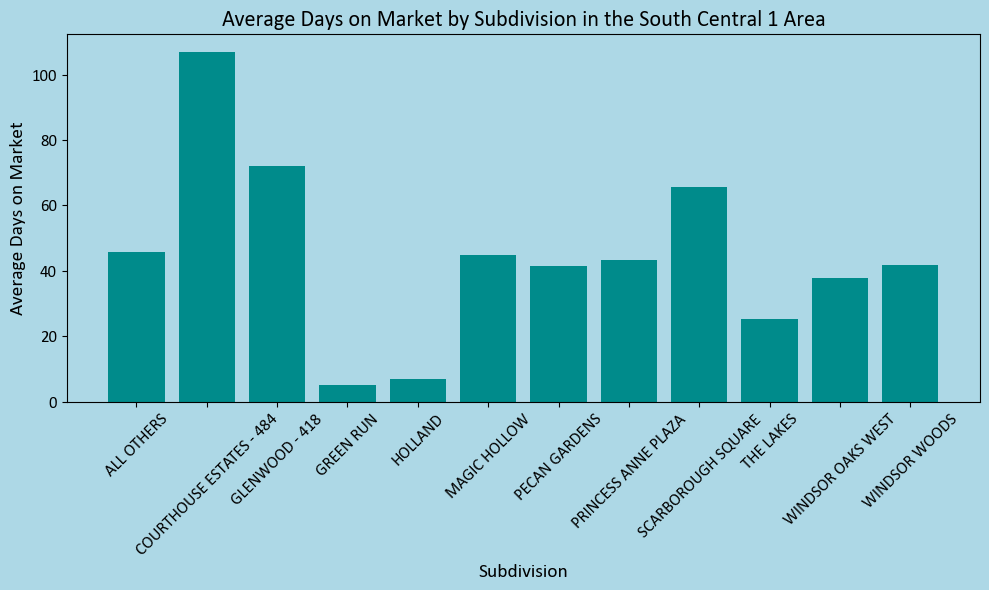

In [273]:
# Group by 'SUBDIVISION' and calculate average 'DAYS_ON_MARKET'
avg_days_on_market = south_cen1_vb_df.groupby('SUBDIVISION')['DAYS_ON_MARKET'].mean().reset_index()

# Set font to Calibri
plt.rcParams['font.family'] = 'Calibri'

fig, ax = plt.subplots(figsize=(10, 6))

# Set the background color of the plot area and the figure
fig.patch.set_facecolor('lightblue')
ax.set_facecolor('lightblue')

# Plot the Average Days on Market as a bar graph
ax.bar(avg_days_on_market['SUBDIVISION'], avg_days_on_market['DAYS_ON_MARKET'], label='Average Days on Market', color='darkcyan')

plt.xlabel('Subdivision', fontsize=14)
plt.ylabel('Average Days on Market', fontsize=14)
plt.title('Average Days on Market by Subdivision in the South Central 1 Area', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('avg_days_on_market_south_central.png')

# Show the plot
plt.show()